In [3]:
from pathlib import Path
import pickle
from om_data.exported import *
from matplotlib import pyplot


In [6]:
dataset_dir = '/home/ynogin/out/exports/TCGA/20220426T125332Z/ScanSets.Lambda_NEB_MTaqI.0'

In [5]:
genome_data: GenomeSeqLabeledExported = pickle.loads(Path(dataset_dir, 'genome.pickle').read_bytes())
print(
    'organism: ', genome_data.organism.name, genome_data.organism.description, '\n'
    'seq: ', genome_data.genome_seq_bytes[:32], '...', '\n'
    'patterns: ', genome_data.genome_seq_labeled.patterns, '\n'
    'num labeled: ', genome_data.labeled_mask.sum(), '\n',
)

FileNotFoundError: [Errno 2] No such file or directory: '/home/ynogin/out/exports/TCGA/20220426T125332Z/ScanSets.Lambda_NEB_MTaqI.0/genome.pickle'

In [7]:
files = list(Path(dataset_dir).glob('segmented_images/*.pickle'))
print(len(files))
print(*files[:1])

719
/home/ynogin/out/exports/TCGA/20220426T125332Z/ScanSets.Lambda_NEB_MTaqI.0/segmented_images/20220426T125647Z_546f180d-ca15-4ad5-9e8a-3b774720a341.pickle


In [ ]:
file = files[0]
segmented_image: SegmentedImageExported = pickle.loads(file.read_bytes())

print(segmented_image.image_metadata.file)
print(len(segmented_image.image_segments))

In [33]:
image_segment = segmented_image.image_segments[-1]
print(image_segment.profile_image_seq.shape)
print(image_segment.profile_coords_map.shape)

(47, 11, 56)
(2, 11, 56)


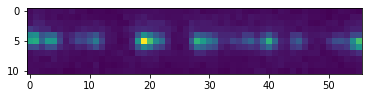

In [34]:
from ipywidgets import interact, IntSlider

profile_image_seq = image_segment.profile_image_seq

def plot_profile(frame):
    pyplot.imshow(profile_image_seq[frame])

plot_profile(0)

In [26]:
interact(frame=IntSlider(min=0, max=len(profile_image_seq)-1))(plot_profile)

interactive(children=(IntSlider(value=0, description='frame', max=46), Output()), _dom_classes=('widget-intera…

<function __main__.plot_profile(frame)>

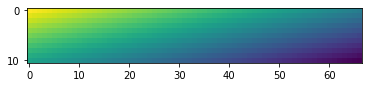

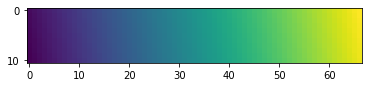

In [94]:
pyplot.figure()
pyplot.imshow(image_segment.profile_coords_map[0])
pyplot.figure()
pyplot.imshow(image_segment.profile_coords_map[1])

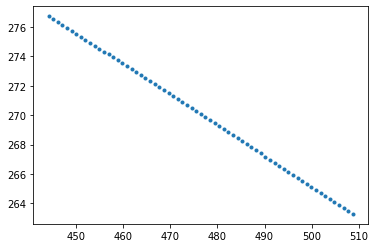

In [95]:
pyplot.plot(*image_segment.profile_curve_coords.T[::-1], '.')